In [ ]:
import pandas as pd
import plotnine as p9
dados = pd.read_json('https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2265/p/all/d/v2265%202')

dados_ipca = dados.rename(columns={'V':'ipca','D3C':'data'}) \
                .query('ipca not in ["Valor", "..."]') \
                .assign(
                data=lambda x: pd.to_datetime(x.data, format="%Y%m"),
                ipca=lambda x: x.ipca.astype(float)
                )[['data', 'ipca']].query("data >= @pd.to_datetime('2004-01-01')")



          data  ipca
538 2024-09-01  4.42
539 2024-10-01  4.76


In [ ]:
def normalizado(data):
    data_min=data.min()
    return (data - data_min) / (data.max()-data_min)

In [73]:
dados_ipca_data=dados_ipca.set_index('data')

<Axes: xlabel='data'>

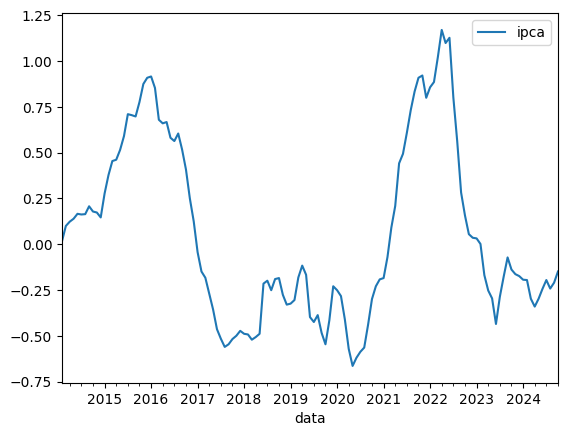

In [72]:
retorno=dados_ipca_data.pct_change().dropna()
retorno_data=retorno.query("index > '2014-01-01'")
retorno_data_acumulado=(retorno_data + 1).cumprod() -1
retorno_data_acumulado.plot()